<div style="float: right; margin-left: 20px;">
  <img src="logo.png" alt="Logo" width="105" height="105"/>
</div>

Democratic and Popular Republic of Algeria \
Ministry of Higher Education and Scientific Research \
National Higher School of Computer Science - May 9 1945 - Sidi Bel Abbes \

### Project: Customer Segmentation Using the <span style="color:blue;">Supervised Learning [KNN, Linear Regression]</span> with <span style="color:blue;">Preprocessing</span> </span> - A Study
___
#### Table of Contents
1. [Data Cleaning and Visualization](#data-cleaning-and-visualization)
2. [Feature Engineering](#feature-engineering)
3. [Data Preprocessing](#data-preprocessing)
4. [Feature Scaling](#feature-scaling)
5. [Correlation Analysis](#correlation_analysis)
6. [Splitting the Dataset](#splitting_the_dataset)
7. [Balancing the Dataset](#balancing_the_dataset)
8. [Training and Evaluating the Model](#training_and_evaluating_the_model)
9. [Conclusion](#conclusion)

More information about the dataset can be found [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

<hr style="border: 0.3px solid black;"/>

## Importing Libraries

In [1]:
! pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


## <span style="color:blue;">1. Data Cleaning and Visualization</span> <a class="anchor" id="data-cleaning-and-visualization"></a>

### 1.1. Loading the dataset

In [3]:
df = pd.read_csv("./Telco-Customer-Churn.csv", index_col = 'customerID')

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Returning the dimensions of the DataFrame

In [4]:
df.shape

(7043, 20)

The data set contains 7043 rows and 20 columns.

####  Returning general statistics of our dataset 

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Returning our features type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

There is something wrong with the data set on the TotalCharges column it must be float not object

#### Change TotalCharges to float

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

### 1.2. Checking for unique values

In [8]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']
StreamingMovies unique values : ['No' 'Yes' 'No internet service']
Contract unique values : ['Month-to-month' 'O

### 1.3. Checking for missing values

In [9]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in features_na:
    print(f"{feature}, {round(df[feature].isnull().mean(), 4)} % Missing values")

TotalCharges, 0.0016 % Missing values


#### Check observation of missing values

In [10]:
df[df[features_na[0]].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


#### Drop missing values

In [11]:
df.dropna(inplace=True)

### 1.4. Checking for duplicate rows

In [12]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 22


#### Drop duplicate rows

In [13]:
df.drop_duplicates(inplace=True)

### 1.5. Checking for outliers

In [14]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df, palette = "Blues")
        ax.set_title(column)
    plt.savefig("Outliers_check.png", dpi=300)
    return plt.show()

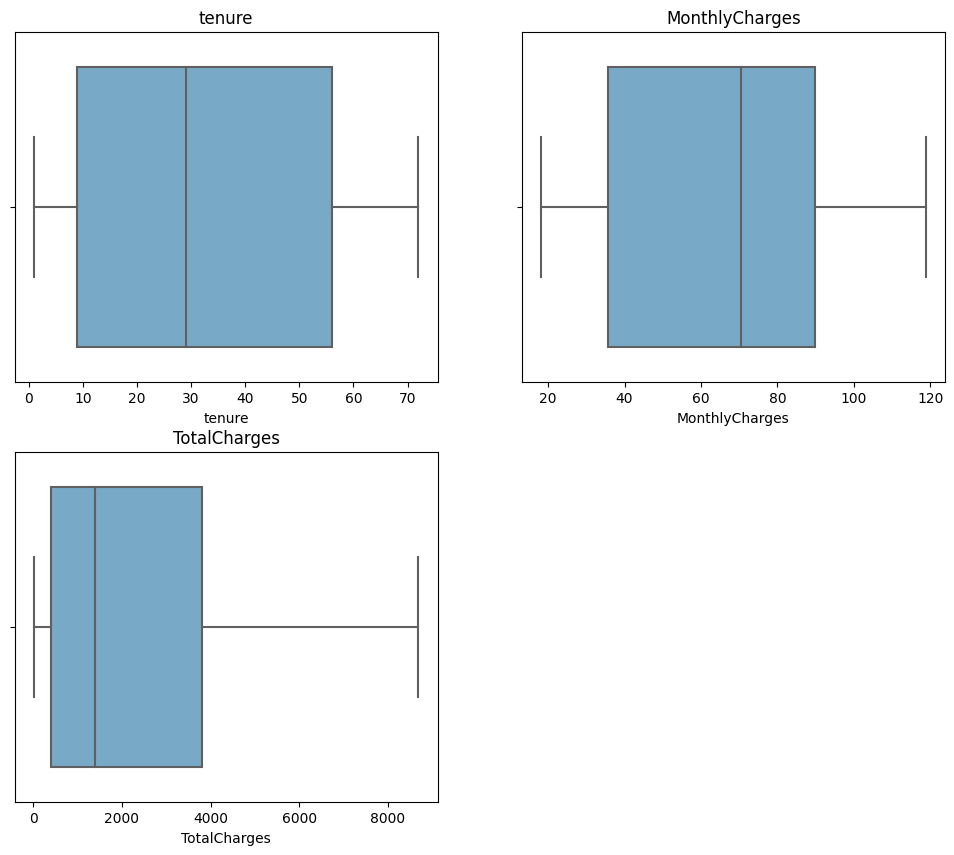

In [15]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(df,numerical_values)

Each numerical variable doesn’t have an outlier

### 1.6. Checking the payment method

In [16]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

#### Delete "automatic" from PaymentMethod

In [17]:
df["PaymentMethod"] = df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

### 1.7. Target Variable Visualization

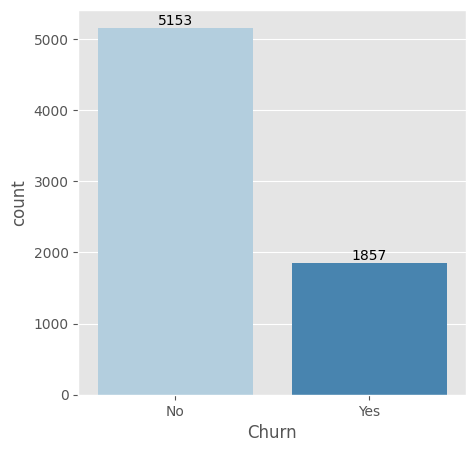

In [18]:
plt.style.use("ggplot")

plt.figure(figsize=(5,5))
ax = sns.countplot(x = df["Churn"],palette="Blues")
ax.bar_label(ax.containers[0])
plt.savefig("Target_variable.png", dpi=300)
plt.show()

the dataset is not balanced 

### 1.8.  Plotting the data by feature

#### 1.8.1. Custumer services

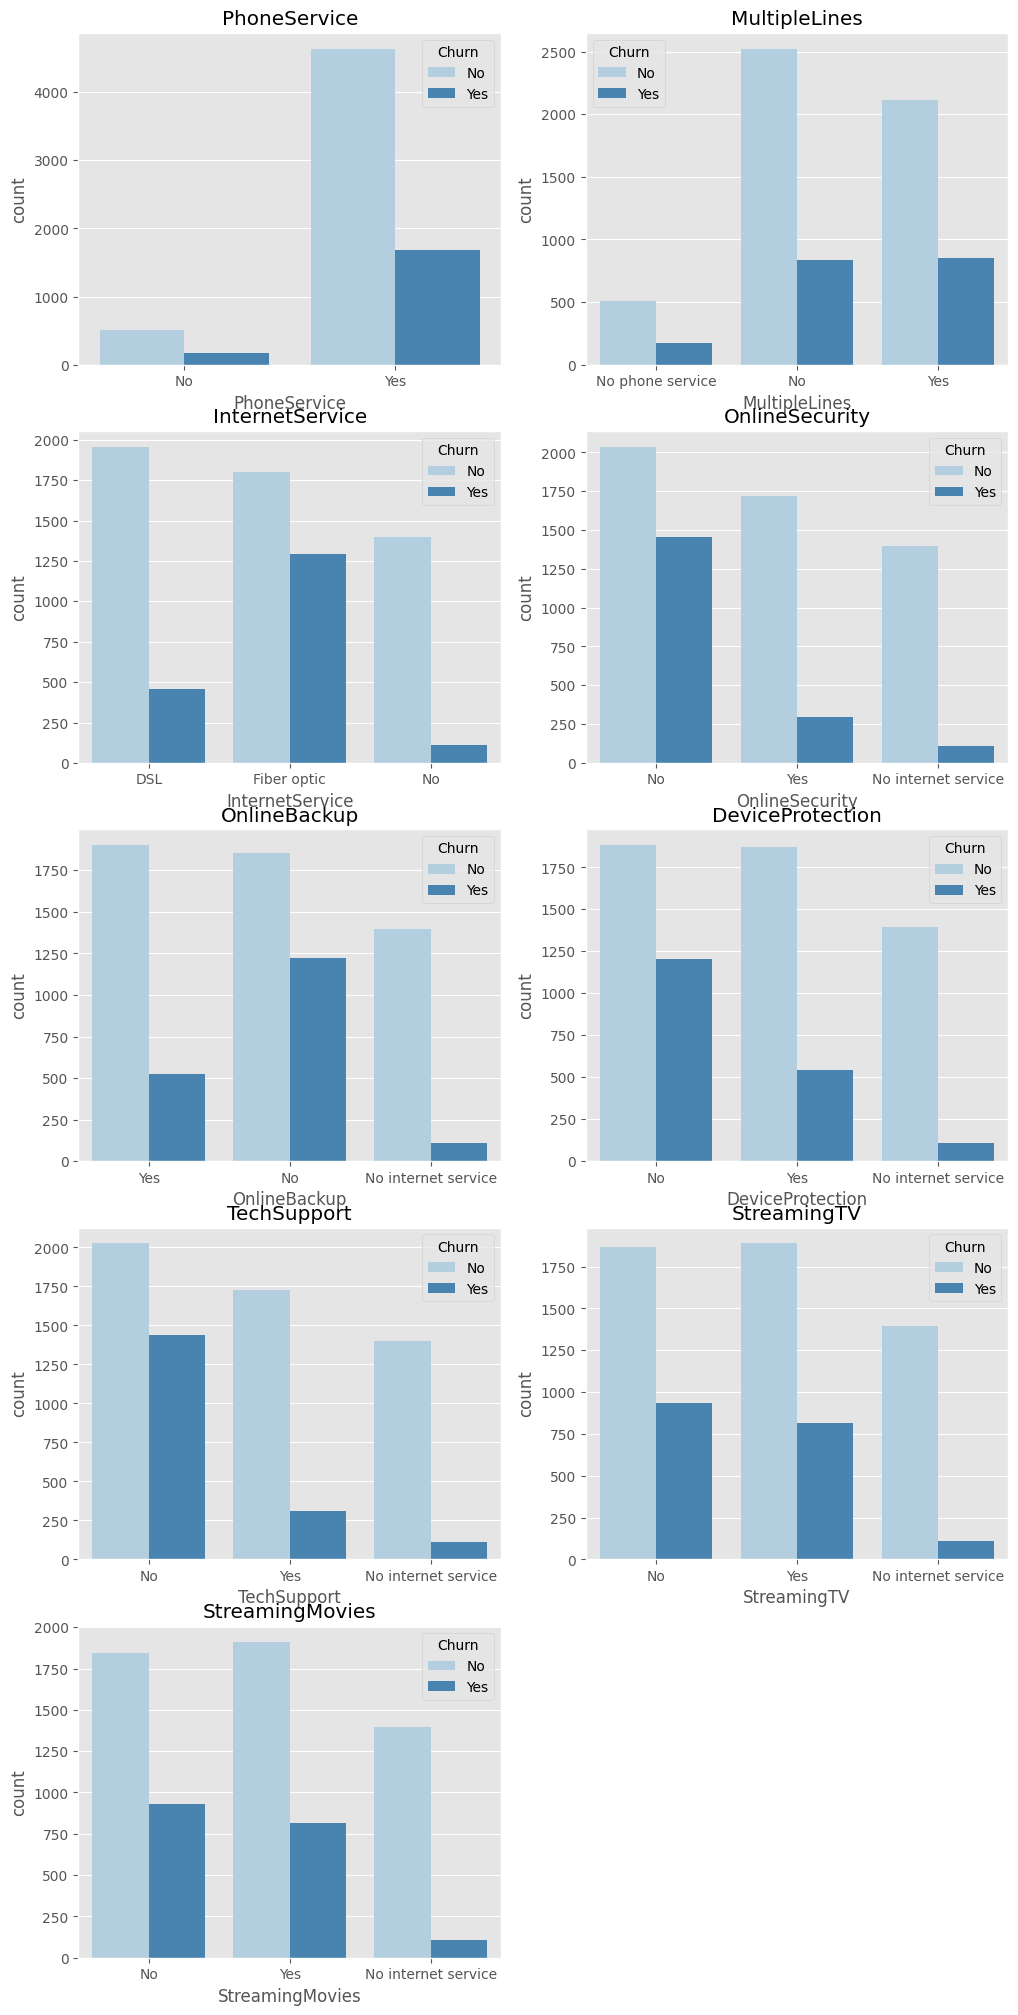

In [19]:
def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(df,customer_services, "Churn")


#### 1.8.2. Customer Account Information [Categorical]

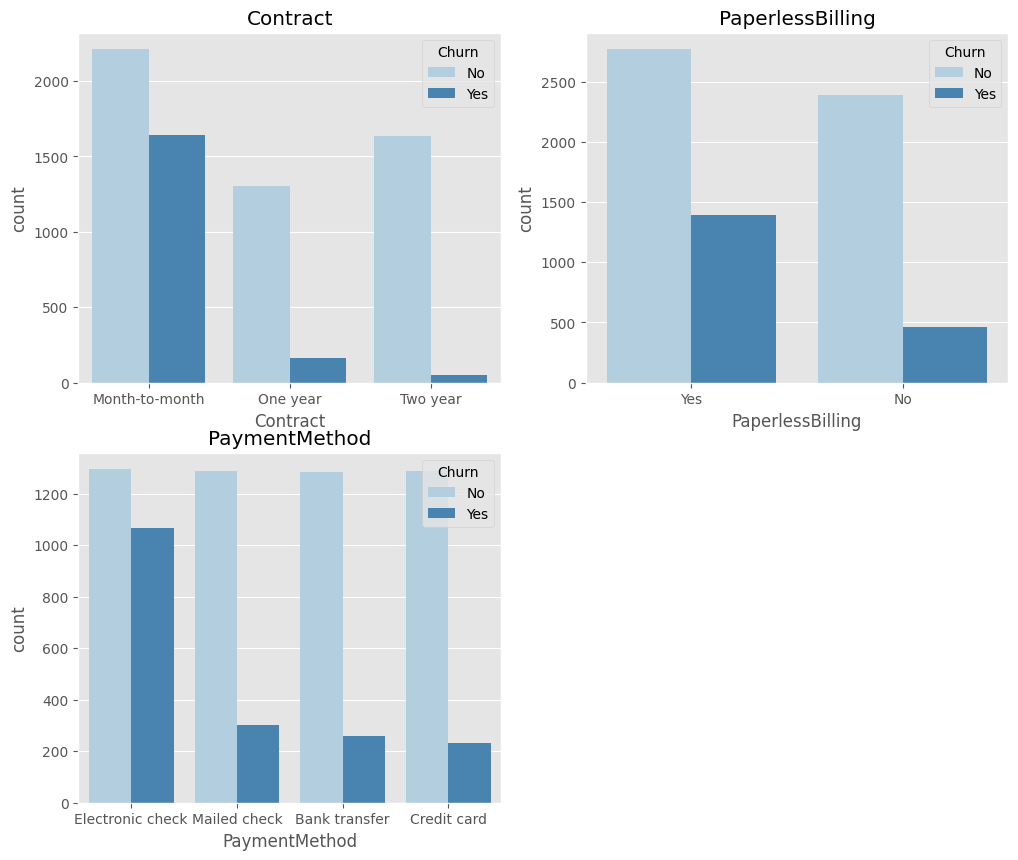

In [20]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(df,customer_account_cat,"Churn")

#### 1.8.3. Customer Account Information [Numerical]

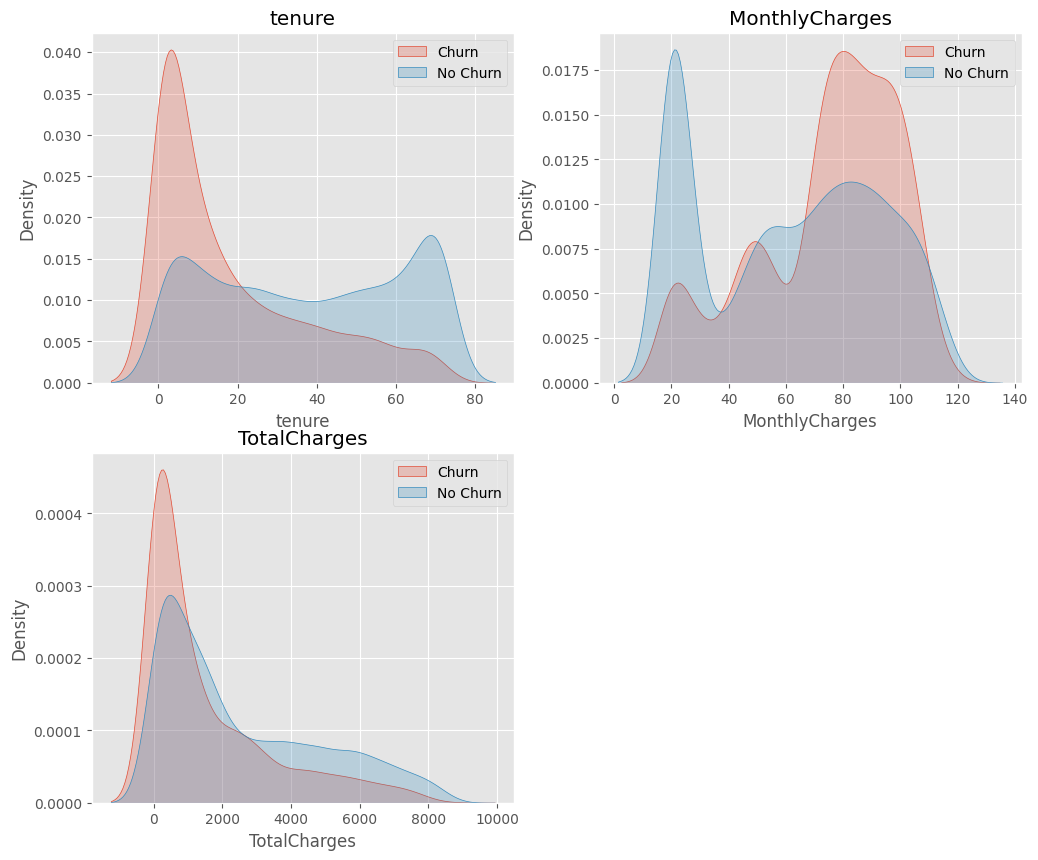

In [21]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")

## <span style="color:blue;"> 2. Feature Engineering </span> <a class="anchor" id="feature-engineering"></a>

### 1. Monthly Charges and Total Charges

In [22]:
df['monthly_to_total_ratio'] = df['MonthlyCharges'] / df['TotalCharges']

In [23]:
print(df.head())

            gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
customerID                                                                ...   
7590-VHVEG  No phone service             DSL             No          Yes  ...   
5575-GNVDE                No             DSL            Yes           No  ...   
3668-QPYBK                No             DSL            Yes          Yes  ...   
7795-CFOCW  No phone service             DSL           

## <span style="color:blue;"> 3. Data Preprocessing </span> <a class="anchor" id="data-preprocessing"></a>

### Converting categorical features to numerical features

#### 3.2.1. Label encoding

In [24]:
feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

#### 3.2.2. One Hot Encoding

In [25]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)

In [26]:
df.dtypes

gender                      int64
SeniorCitizen               int64
Partner                     int64
Dependents                  int64
tenure                      int64
PhoneService                int64
MultipleLines              object
InternetService            object
OnlineSecurity             object
OnlineBackup               object
DeviceProtection           object
TechSupport                object
StreamingTV                object
StreamingMovies            object
Contract                   object
PaperlessBilling            int64
PaymentMethod              object
MonthlyCharges            float64
TotalCharges              float64
Churn                       int64
monthly_to_total_ratio    float64
dtype: object

## <span style="color:blue;"> 4. Feature Scaling </span> <a class="anchor" id="feature-scaling"></a>

In [27]:
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

## <span style="color:blue;"> 5. Correlation analysis </span> <a class="anchor" id="feature-scaling"></a>

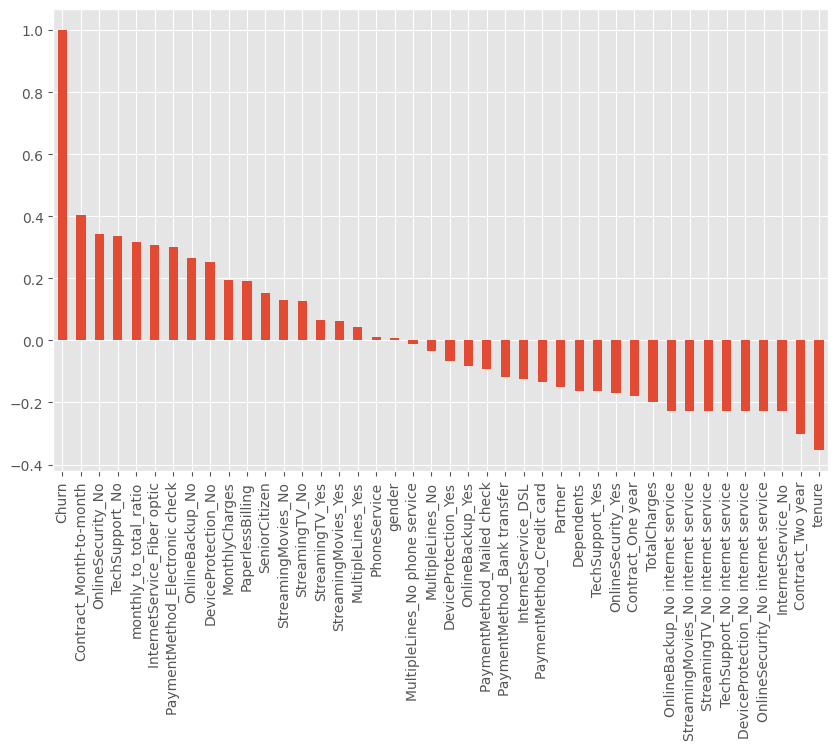

In [28]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("correlation.png", dpi=300)
plt.show()

## <span style="color:blue;"> 6. Splitting the dataset </span> <a class="anchor" id="feature-scaling"></a>

In [29]:
X = df.drop(columns = "Churn")
y = df.Churn

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5608, 41), (1402, 41), (5608,), (1402,))

## <span style="color:blue;"> 7. Balancing the dataset </span> <a class="anchor" id="feature-scaling"></a>

In [30]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### Create a DataFrame from the resampled data

In [31]:
resampled_df = pd.DataFrame(X_train_resampled)
resampled_df["Churn"] = y_train_resampled

#### View the class distribution

In [32]:
resampled_df.describe()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,monthly_to_total_ratio,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
count,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,...,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.00000
mean,0.374699,0.497314,0.233923,0.461184,0.166667,0.403081,0.228045,0.903688,0.624212,0.203718,...,0.161572,0.402475,0.655871,0.163028,0.167273,0.178675,0.174915,0.405264,0.195415,0.50000
std,0.333563,0.286426,0.249860,0.498521,0.372701,0.490547,0.419597,0.295037,0.484355,0.309923,...,0.368080,0.490426,0.475112,0.369413,0.373242,0.383104,0.379918,0.490973,0.396544,0.50003
min,0.000000,0.002985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.070423,0.271661,0.032291,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.021017,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.281690,0.563184,0.134658,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.051549,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50000
75%,0.661972,0.724891,0.372482,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.212236,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000
max,1.000000,0.999005,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


#### Plot the class distribution

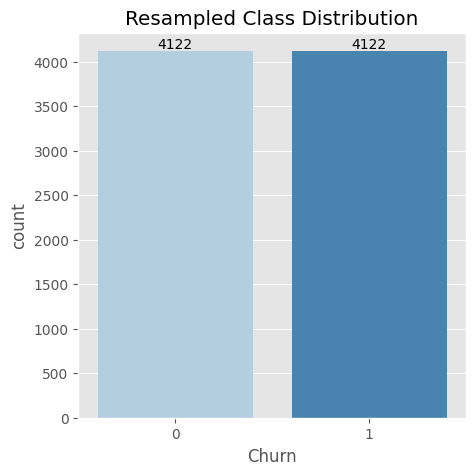

In [47]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x="Churn", data=resampled_df, palette="Blues")
ax.bar_label(ax.containers[0])
plt.title("Resampled Class Distribution")
plt.savefig("Target_variable_balanced.png", dpi=300)
plt.show()

## <span style="color:blue;"> 7. Training and evaluating the model </span> <a class="anchor" id="feature-scaling"></a>

### 1. Preparing the functions

In [34]:
# For logistic Regression
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index = X_df.columns.values).sort_values(ascending=False)
    
    top_10_weights = weights[:10]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Top 10 Features")
    top_10_weights.plot(kind="bar")
    
    bottom_10_weights = weights[len(weights)-10:]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Bottom 10 Features")
    bottom_10_weights.plot(kind="bar")
    print("")

In [35]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    cm = confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.savefig("Confusion_Matrix.png", dpi=300)
    plt.show()
    
    print(f"Accuracy Score Test = {accuracy_score(y_pred,y_test)}")
    print(f"Accuracy Score Train = {classifier.score(X_train,y_train)}")
    return print("\n")

In [36]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities,classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr,label=f"{classifier_name}")
    plt.title(f"{classifier_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.savefig("ROC_Curve.png", dpi=300)
    plt.show()
    return print(f"AUC Score (ROC):{roc_auc_score(y_test,y_pred_prob)}")

In [37]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall,precision, label=f"{classifier_name}")
    plt.title(f"{classifier_name}-ROC Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    plt.savefig("Precision_recall_curve.png", dpi=300)
    f1_score_result, auc_score = f1_score(y_test,y_pred), auc(recall,precision)
    return print(f"f1 Score : {f1_score_result} \n AUC Score (PR) : {auc_score}")

### 1. KNN Model

#### 1.1. Setting up the model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)

#### 1.2. Confusion matrix

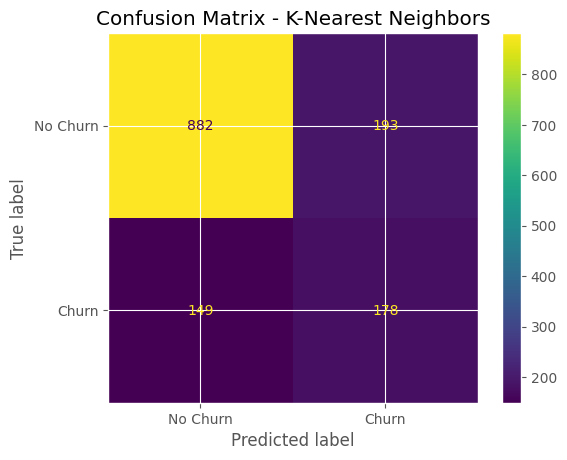

Accuracy Score Test = 0.7560627674750356
Accuracy Score Train = 0.8364835948644793




In [39]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, y_pred_knn, knn, "K-Nearest Neighbors")

#### 1.3. ROC curve

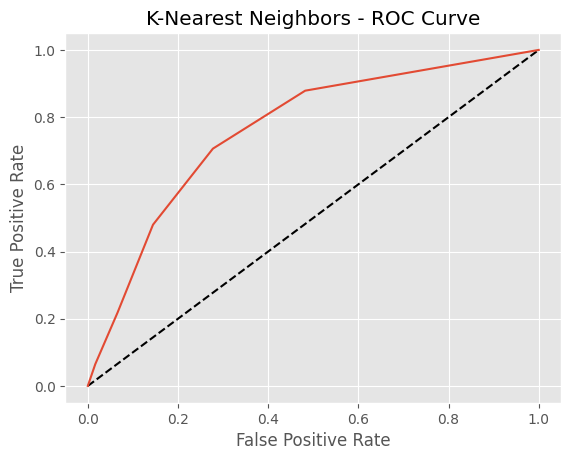

AUC Score (ROC):0.7624659804810969


In [40]:
roc_curve_auc_score(X_test,y_test,y_pred_knn_proba, "K-Nearest Neighbors")

#### 1.4. Precision recall curve

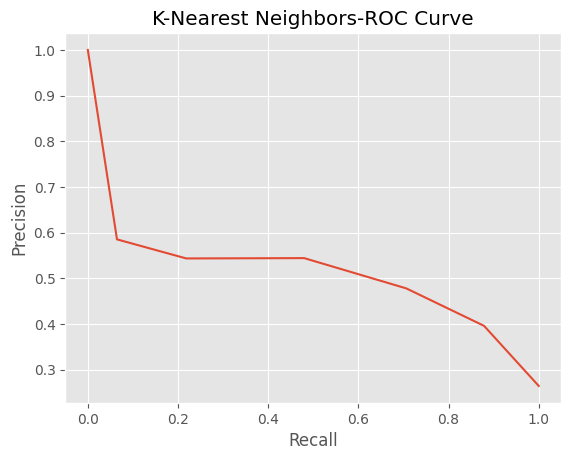

f1 Score : 0.5100286532951289 
 AUC Score (PR) : 0.5114582832897354


<Figure size 640x480 with 0 Axes>

In [41]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_knn_proba,"K-Nearest Neighbors")

### 2. Logistic Regression

#### 2.1. Setting up the model

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)

#### 2.2. Feature weights

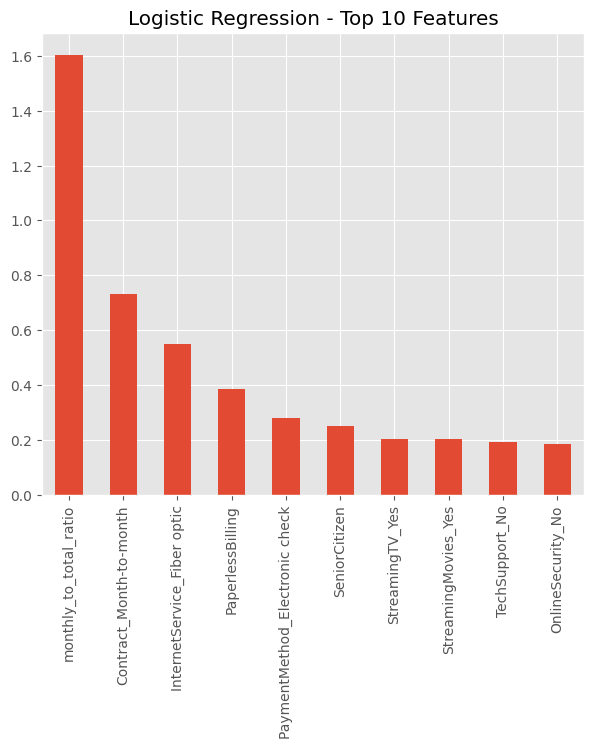

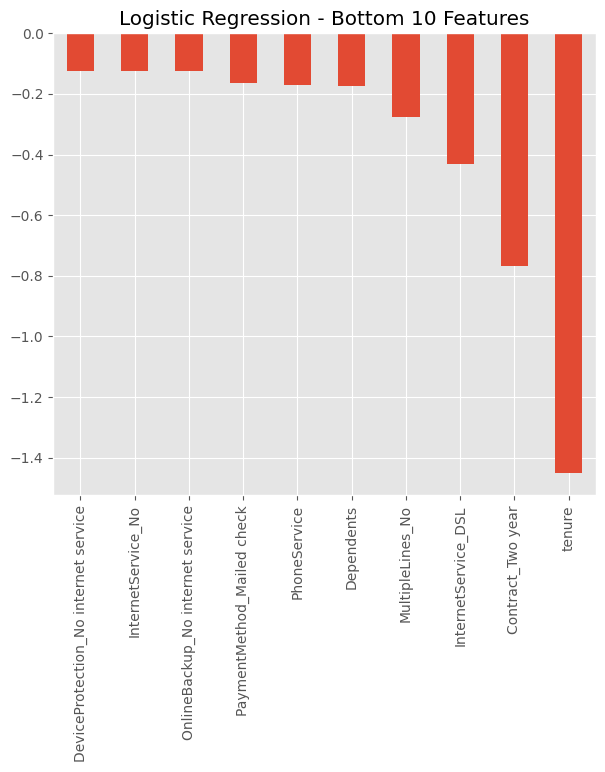

In [43]:
feature_weights(X_train,logreg,"Logistic Regression")

#### 2.3. Confusion matrix

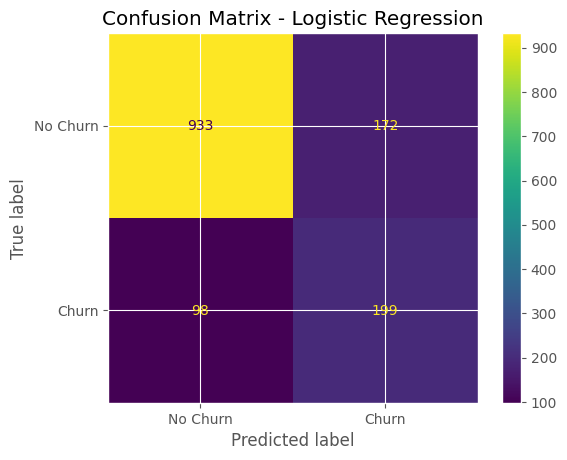

Accuracy Score Test = 0.8074179743223966
Accuracy Score Train = 0.8088445078459344




In [44]:
confusion_matrix_plot(X_train,y_train,X_test,y_test, y_pred_logreg,logreg,"Logistic Regression")

#### 2.4. ROC curve

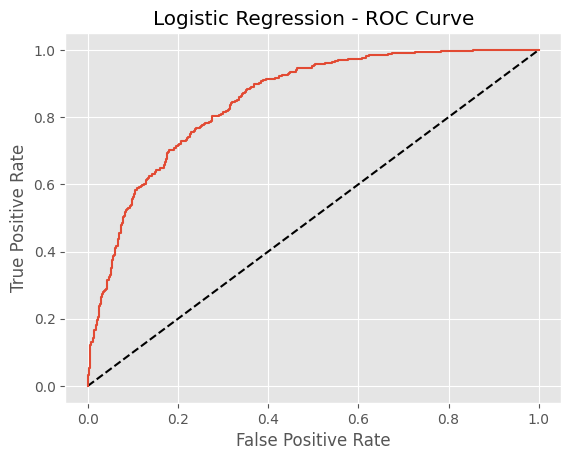

AUC Score (ROC):0.8492265379698354


In [45]:
roc_curve_auc_score(X_test, y_test, y_pred_logreg_proba, "Logistic Regression")

#### 2.5. Precision trecall curve

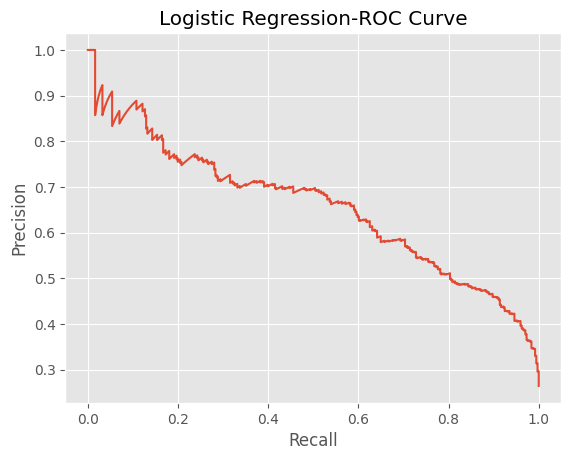

f1 Score : 0.5100286532951289 
 AUC Score (PR) : 0.6560023409994086


<Figure size 640x480 with 0 Axes>

In [46]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_logreg_proba,"Logistic Regression")